In [417]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve, eigvals
from scipy.stats import wishart

In [247]:
plt.rcParams.update({"figure.figsize": (16, 10), "font.size": 16})

## Problem Formulation

Generate Hessian (PSD matrix)

In [452]:
A = wishart.rvs(2, (1, 1))

Generate Gradient (1d vector)

In [406]:
b = torch.rand(2, 1)

## Visualization

Solve for centering

In [441]:
solution = solve(A, b)

In [442]:
solution_x = solution[0][0]
solution_y = solution[1][0]

In [443]:
solution_x, solution_y

(8.232511566428967, 7.515045042708242)

Calculate Heights

In [444]:
x = np.linspace(min(solution_x, 0) - 3, max(solution_x, 0) + 3, 100)
y = np.linspace(min(solution_y, 0) - 3, max(solution_y, 0) + 3, 100)

In [445]:
X, Y = np.meshgrid(x, y)

In [446]:
inputs = np.stack((X, Y), axis=1)

In [447]:
def get_z(X, Y, A, b):
    inputs = np.stack((X, Y), axis=1)
    square_term = np.einsum("bij,ki,bkj->bj", inputs, A, inputs)
    linear_term = np.einsum("ki,bkj->bj", b, inputs)
    return 0.5 * square_term - linear_term

In [448]:
Z = get_z(X, Y, A, b)

Visualize Surface

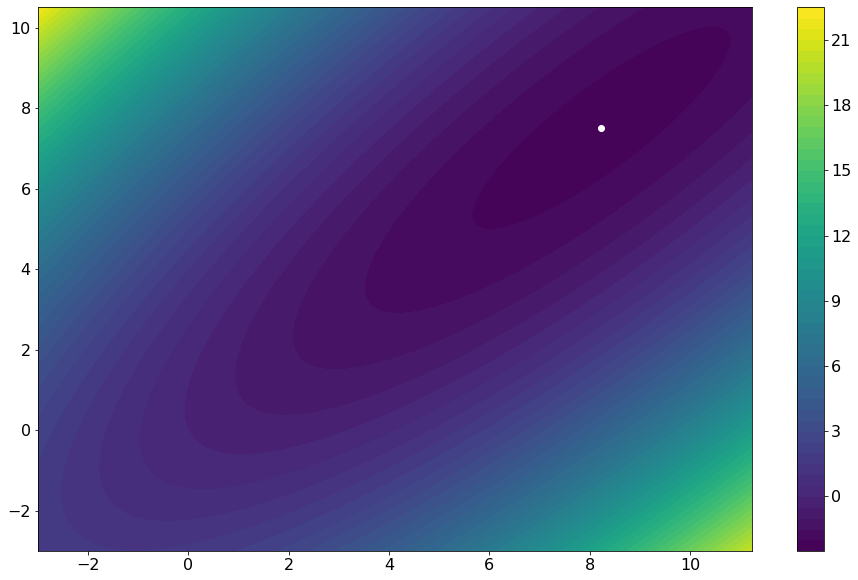

In [449]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z, 50)
fig.colorbar(cs)

_ = ax.plot(solution_x, solution_y, "wo")

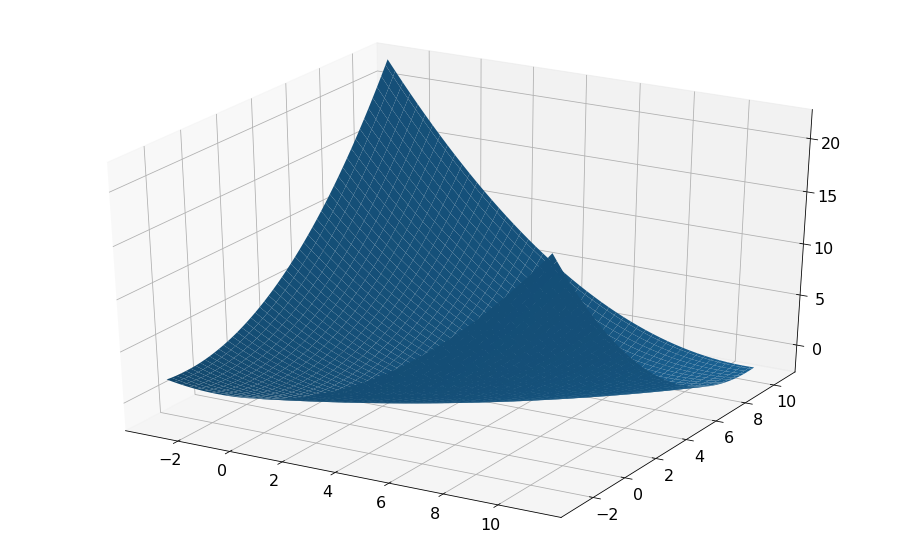

In [450]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, Z)